**In this notebook we are going to explore Stanford car dataset and classify cars using CNN**

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

# Any results you write to the current directory are saved as output.

['car_data', 'anno_test.csv', 'names.csv', 'anno_train.csv']


**Lets look at some images**

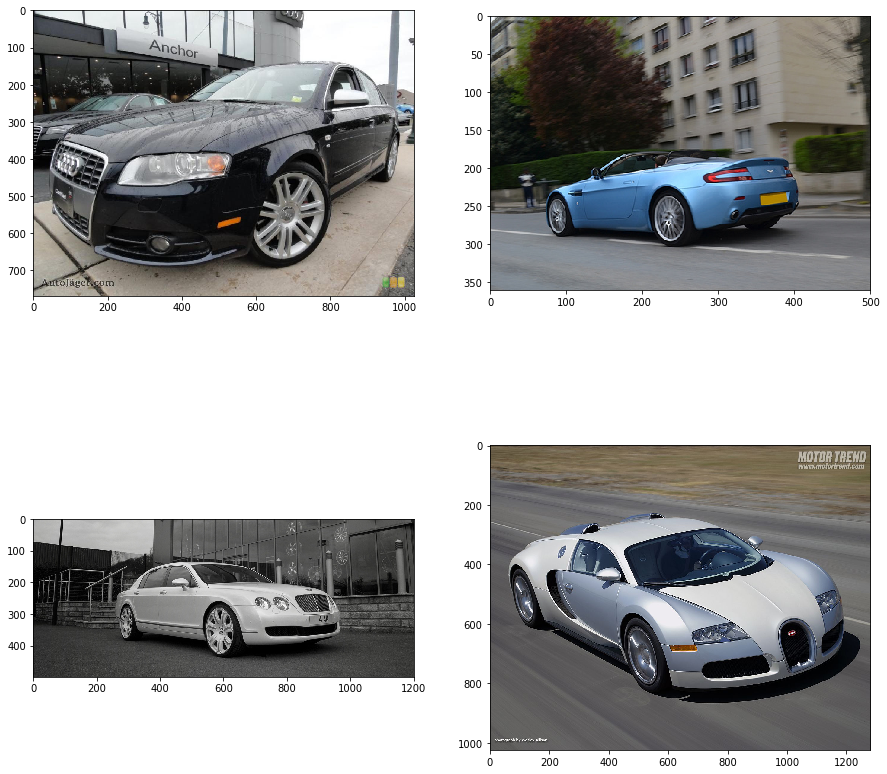

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
img1 = plt.imread("../input/car_data/car_data/train/Audi S4 Sedan 2007/00159.jpg")
img2 = plt.imread("../input/car_data/car_data/train/Aston Martin V8 Vantage Convertible 2012/00065.jpg")
img3 = plt.imread("../input/car_data/car_data/train/Bentley Continental Flying Spur Sedan 2007/00057.jpg")
img4 = plt.imread("../input/car_data/car_data/train/Bugatti Veyron 16.4 Coupe 2009/01249.jpg")

ax = axes[0,0]
ax1 = axes[0,1]
ax2 = axes[1,0]
ax3 = axes[1,1]

ax.imshow(img1)
ax1.imshow(img2)
ax2.imshow(img3)
ax3.imshow(img4)

**Let's create the model for classification**

In [7]:
cnn = Sequential()
#Adding 1st Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 2nd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 3rd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 4th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 5th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

#Flatten
cnn.add(Flatten())

#Adding Input and Output Layer
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=196,activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
#Data agumentation
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('../input/car_data/car_data/train',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory('../input/car_data/car_data/test',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [11]:
history = cnn.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=test_data,
                            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 106s 1s/step - loss: 5.2798 - acc: 0.0050 - val_loss: 5.2774 - val_acc: 0.0069
Epoch 2/30
100/100 [==============================] - 100s 1s/step - loss: 5.2788 - acc: 0.0072 - val_loss: 5.2776 - val_acc: 0.0081
Epoch 3/30
100/100 [==============================] - 97s 972ms/step - loss: 5.2772 - acc: 0.0088 - val_loss: 5.2729 - val_acc: 0.0119
Epoch 4/30
100/100 [==============================] - 92s 920ms/step - loss: 5.2711 - acc: 0.0097 - val_loss: 5.2772 - val_acc: 0.0069
Epoch 5/30
100/100 [==============================] - 93s 929ms/step - loss: 5.2606 - acc: 0.0078 - val_loss: 5.2582 - val_acc: 0.0131
Epoch 6/30
100/100 [==============================] - 90s 895ms/step - loss: 5.1990 - acc: 0.0119 - val_loss: 5.2233 - val_acc: 0.0120
Epoch 7/30
100/100 [==============================] - 89s 889ms/step - loss: 5.1691 - acc: 0.0103 - val_loss: 5.1666 - val_acc: 0.0056
Epoch 8/30
100/100 [==============================] - 89s 8

In [13]:
vals = pd.DataFrame.from_dict(history.history)
vals = pd.concat([pd.Series(range(0,30),name='epochs'),vals],axis=1)
vals.head()

,epochs,val_loss,val_acc,loss,acc
0,0,5.277419,0.006875,5.279800,0.005000
1,1,5.277560,0.008125,5.278782,0.007188
2,2,5.272898,0.011875,5.277222,0.008794
3,3,5.277245,0.006875,5.271100,0.009687
4,4,5.258218,0.013125,5.260586,0.007812


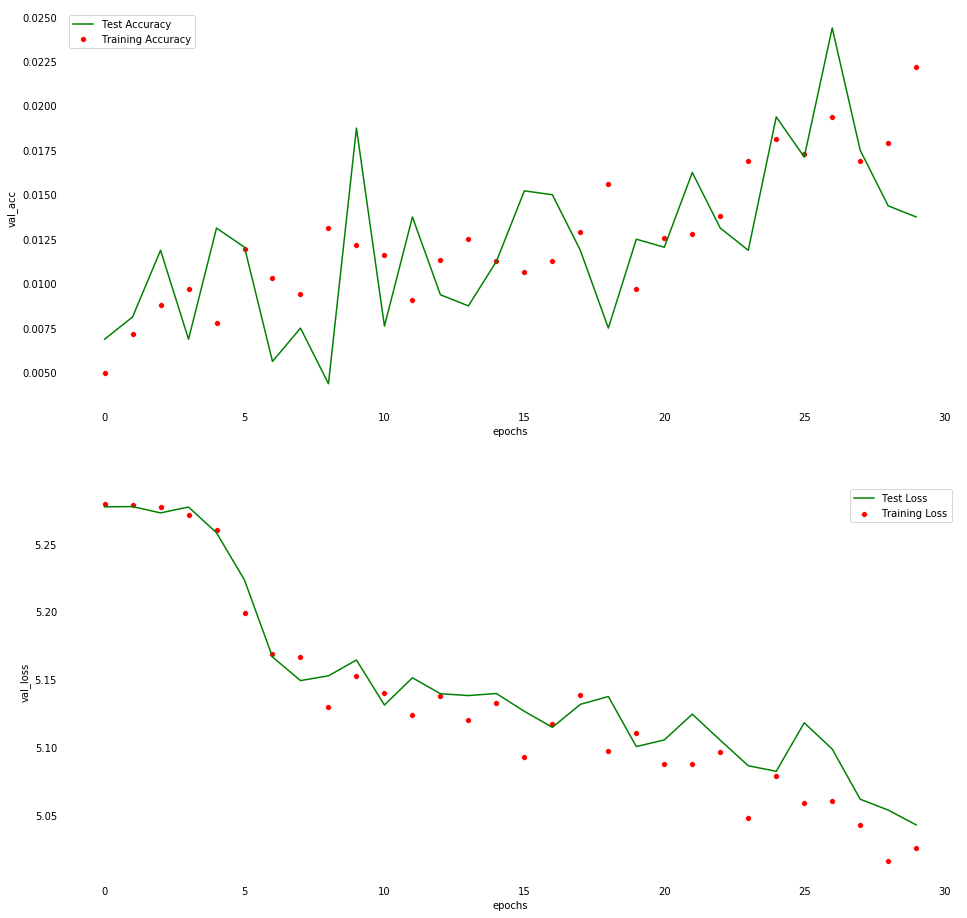

In [17]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])